In [41]:
import numpy as np
import pandas as pd
from digitaldna.lcs import LongestCommonSubsequence

In [42]:
#Change directories use the DNA datasets

ga= pd.read_csv("/xxx/genuine_account_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
s1= pd.read_csv("/xxx/social_bot1_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
s2= pd.read_csv("/xxx/social_bot2_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
s3= pd.read_csv("/xxx/social_bot3_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
t1= pd.read_csv("/xxx/traditional_spambot_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
ru= pd.read_csv("/xxx/rus_bot_DNA.csv", na_filter=False, lineterminator='\n', sep=',')
ff= pd.read_csv("/xxx/fake_follower_DNA.csv", na_filter=False, lineterminator='\n', sep=',')

In [76]:
#concat the datasets according to the experiment

dataset = pd.concat([ff,ga,s1,s2,s3,t1,ru])

In [80]:
#first set threshold 'auto' then look estimator plot and give the value of split point

estimator = LongestCommonSubsequence(in_path='', out_path='/tmp/glcr_cache', overwrite=False, threshold=2000, window=10)
result = estimator.fit_predict(dataset["DNA"])

fitting...
predicting...
done.


<module 'matplotlib.pyplot' from '/home/bugra/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

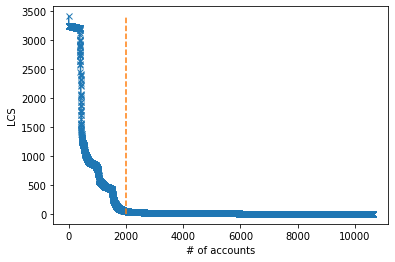

In [81]:
estimator.plot_LCS()

In [ ]:
result = pd.Series(sonuc).map({True:1, False:0})

In [ ]:
#these IDs are the IDs used as test sets of Model2 and Model 3
#aim is testing the models with same setup

from numpy import loadtxt
ids = loadtxt("/xxx/ids_scenario1.txt", delimiter="\n", unpack=False) #fill the directory according to scenario

In [ ]:
result_DF = pd.DataFrame()
result_DF['user_id'] = dataset['user_id']
result_DF['knownBot'] = dataset['knownBot\r']
result_DF['LCS_result'] = result
result_DF_ = result_DF[result_DF['user_id'].isin(ids)] #select the ids which are used in Model 2 and 3 as test sets
result_DF_

In [ ]:
#real = dataset['knownBot\r'] # use these to test with full dataset
#pred = result # use these to test with full dataset

real = result_DF_['knownBot']
pred = result_DF_['LCS_result']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Accuracy:", accuracy_score(real, pred))
print("F1 Score:", f1_score(real, pred))
print("AUC:", roc_auc_score(real,pred))